# ***Image Classification Using SVM and PCA***

```
`KHUSHAL DAS - khushaldasparmar@gmail.com`
```

```
`Assignment: Machine Learning`
```

```
`Univerity of Management and Technology, Lahore`
```



Flowers Dataset 
Link to Dataset used: https://drive.google.com/drive/u/1/folders/1pWsm5giojvKoG4QUIOn5hcn-EutNCGCT

Training Images: 480  
Testing Images: 120 

1. Trained on SVM classifier on dataset after applying simple preprocessing techniques
2. PCA overview and working on one image
3. Applied PCA on whole Dataset and then trained on SVM

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from matplotlib import pyplot

from matplotlib.image import imread

from PIL import Image 
from PIL import ImageFilter
from sklearn.svm import LinearSVC

from sklearn.decomposition import PCA

 **Ploting Few Images**

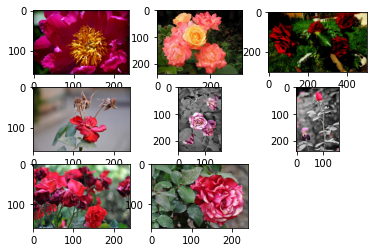

In [ ]:
folder = 'flowerDataset/train/'

# plot images
for i in range(8):
	pyplot.subplot(330 + 1 + i)
	filename =folder+ 'rose_' + str(i) + '.jpg'  # define filename
	image = imread(filename) # load image pixels
	pyplot.imshow(image) # plot raw pixel data

pyplot.show() # show the figure

**Loading Training and testing Images**

In [ ]:
TRAIN_DIR = 'flowerDataset/train/'
train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)] # use this for training images


TEST_DIR = 'flowerDataset/test/'
test_images = [TEST_DIR+i for i in os.listdir(TEST_DIR)] # use this for test images

train_images.remove('flowerDataset/train/.ipynb_checkpoints')
#test_images.remove('flowerDataset/test/.ipynb_checkpoints')


**Variables Decalaration for Further use**

In [ ]:
#get labels
predictedlabels=[]
labels_test=[]
labels_train=[]
#images=[]

**Labeling Training Data**

In [ ]:
def train():      
    labels_train=[]
    for i in os.listdir(TRAIN_DIR):

        if 'rose' in i:
            labels_train.append(1)
            
        elif 'sunflower' in i:
            labels_train.append(0)
    
    return labels_train

**Labeling Training Data**

In [ ]:
def test():      

    labels_test=[]
    for i in os.listdir(TEST_DIR):

        if 'rose' in i:
            
            labels_test.append(1)

        elif 'sunflower' in i:
            labels_test.append(0)

    return labels_test

**Verifying Predicted Lables and Already labeled testing images to calculate accuracy**

In [ ]:
def getResults(predictedlabels, labels_test):    #outputs accuracy

    total=0
    newpredict=[]
    for r in range(0,len(labels_test)):
   
        if float(predictedlabels[r])>0.5:
            newpredict.append(1)
        else:
            newpredict.append(0)
            
       
        if newpredict[r] == labels_test[r]:
            total+=1
         
    print("Accuracy:",total,"/",len(labels_test),"* 100 =","{0:.3f}".format(total/len(labels_test)*100),"%")

**PRocessing Dataset**

In [ ]:
def processing():

  results_1=[]

  pix_val=0
  
  for i in train_images:
      pil_im = Image.open(i).convert('L')

      size=64,64

      #Some images captured by a camera and fed to our AI algorithm vary in size, 
      #therefore, we should establish a base size for all images fed into our AI algorithms.
      pil_im = pil_im.resize(size, Image.ANTIALIAS)
      
      # we use GaussianBlur to Remove noise
      pil_im = pil_im.filter(ImageFilter.GaussianBlur(255))

      pix_val = pil_im.histogram() 
      
      results_1.append(pix_val)

  return results_1


**SVM Function for data training**

In [ ]:
def svm(y):            

    results_1=[]
    clf = LinearSVC()
    
    #data processing before sending to training
    #reults_1 = processing()

    pix_val=0
  
    for i in train_images:
      pil_im = Image.open(i).convert('L')

      size=64,64

      #Some images captured by a camera and fed to our AI algorithm vary in size, 
      #therefore, we should establish a base size for all images fed into our AI algorithms.
      pil_im = pil_im.resize(size, Image.ANTIALIAS)
      
      # we use GaussianBlur to Remove noise
      pil_im = pil_im.filter(ImageFilter.GaussianBlur(255))

      pix_val = pil_im.histogram() 
      
      results_1.append(pix_val)

    clf = clf.fit(results_1,y)

    return clf

In [ ]:
def svm_AfterPCA(y):            

    results_1=[]
    clf = LinearSVC()
    
    #data processing before sending to training
    #reults_1 = processing()

    pix_val=0
  
    for i in train_images:
      pil_im1=Image.fromarray(i,"RGB")
     # pil_im1 = i

      size=64,64

      #Some images captured by a camera and fed to our AI algorithm vary in size, 
      #therefore, we should establish a base size for all images fed into our AI algorithms.
      pil_im1 = pil_im1.resize(size, Image.ANTIALIAS)
      
      # we use GaussianBlur to Remove noise
      pil_im1 = pil_im1.filter(ImageFilter.GaussianBlur(255))

      pix_val = pil_im1.histogram() 
      
      results_1.append(pix_val)

    clf = clf.fit(results_1,y)

    return clf

**Getting training images labeled and storing in *y* variable**

In [ ]:
y = train()   #get correct labels

print (len(y) , "   ",len(train_images))


480     480


**Getting testing images labled and storing in labels_ variable**

In [ ]:
y = np.array(y).reshape(-1,1)

clf = svm(y)   #get trained svm 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


**Training labled training images using SVM**

In [ ]:
lables_ = test()   #get correct labels
len(lables_)

120

**Predicting testing images using trained model**

In [ ]:
results_=[]
for i in test_images:
  pil_im = Image.open(i).convert('L')
  size=64,64
  
  pil_im = pil_im.resize(size, Image.ANTIALIAS)
  pil_im = pil_im.filter(ImageFilter.GaussianBlur(255))
  pix_val = pil_im.histogram() 
    
  results_.append(pix_val)

predictedlabels = clf.predict(X=results_)


**Finding Accuracy**

In [ ]:
results_ = getResults(predictedlabels, labels_test)

Accuracy: 60 / 120 * 100 = 50.000 %


# **PCA on image Data**

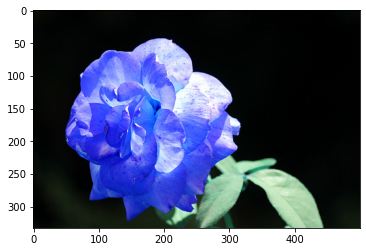

In [ ]:
img = cv2.imread('flowerDataset/test/rose_50.jpg') #you can use any image you want.
plt.imshow(img)

In [ ]:
# Splitting the image in R,G,B arrays.
blue,green,red = cv2.split(img) 

In [ ]:
def compressImage(val):

  #initialize PCA with first 20 principal components
  pca = PCA(val)
  
  #Applying to red channel and then applying inverse transform to transformed array.
  red_transformed = pca.fit_transform(red)
  red_inverted = pca.inverse_transform(red_transformed)
  
  #Applying to Green channel and then applying inverse transform to transformed array.
  green_transformed = pca.fit_transform(green)
  green_inverted = pca.inverse_transform(green_transformed)
  
  #Applying to Blue channel and then applying inverse transform to transformed array.
  blue_transformed = pca.fit_transform(blue)
  blue_inverted = pca.inverse_transform(blue_transformed)
  img_compressed = (np.dstack((red_inverted, red_inverted, red_inverted))).astype(np.uint8)

  #print(img_compressed)

  return img_compressed

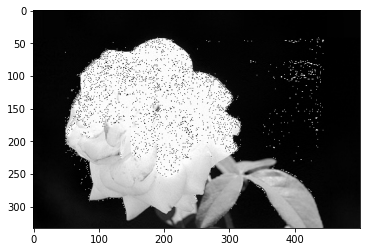

In [ ]:
compressed1 = compressImage(150)

#viewing the compressed image
plt.imshow(compressed1)

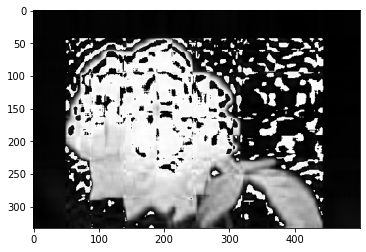

In [ ]:
compressed2 = compressImage(20)

#viewing the compressed image
plt.imshow(compressed2)

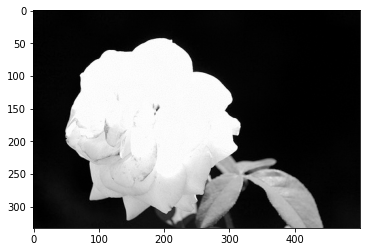

In [ ]:
compressed3 = compressImage(300)

#viewing the compressed image
plt.imshow(compressed3)

# **Training Data after applying PCA on all images**

In [ ]:
def PCAonAllImages():
  i=0
  
  for img_ in train_images:
    img2 = cv2.imread(img_) #you can use any image you want.
    blue,green,red = cv2.split(img2)
    train_images[i] = compressImage(150)
    i=i+1


In [ ]:
def PCAonTestImages():
  i=0
  
  for img_ in test_images:
    img2 = cv2.imread(img_) #you can use any image you want.
    blue,green,red = cv2.split(img2)
    test_images[i] = compressImage(150)
    i=i+1


In [ ]:
PCAonAllImages()


In [ ]:
PCAonTestImages()

In [ ]:
clf = svm_AfterPCA(y) 

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
labels_= test()

In [ ]:
results_=[]
for i in test_images:
  pil_im = Image.fromarray(i,"RGB")
  size=64,64
  
  pil_im = pil_im.resize(size, Image.ANTIALIAS)
  pil_im = pil_im.filter(ImageFilter.GaussianBlur(255))
  pix_val = pil_im.histogram() 
    
  results_.append(pix_val)

predictedlabels = clf.predict(X=results_)


In [ ]:
results_ = getResults(predictedlabels, labels_test)

Accuracy: 60 / 120 * 100 = 50.000 %
